<a href="https://colab.research.google.com/github/lweinzierl/wikiart-training/blob/main/wikiart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Treniranje sa EfficientNetB0

In [ ]:
import kagglehub
import os

# Skini dataset (ide brzo jer je cache)
path = kagglehub.dataset_download("trungit/wikiart25k")
print("Dataset path:", path)

# Provjera što je unutra
print("Sadržaj path foldera:", os.listdir(path))


Dataset path: /kaggle/input/wikiart25k
Sadržaj path foldera: ['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'wikiart25k.txt', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']


In [ ]:
wikiart_path = kagglehub.dataset_download("trungit/wikiart25k")
print("WikiArt25k path:", wikiart_path)


WikiArt25k path: /kaggle/input/wikiart25k


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path
dataset_path = '/root/.cache/kagglehub/datasets/trungit/wikiart25k/versions/1'

# Generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,   # VAŽNO: batch_size = 8
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/trungit/wikiart25k/versions/1'

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Baza modela
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Kompletan model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Kompajliranje
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

NameError: name 'model' is not defined

In [ ]:
model.save("efficientnetb0_wikiart_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("efficientnetb0_wikiart_model.h5")


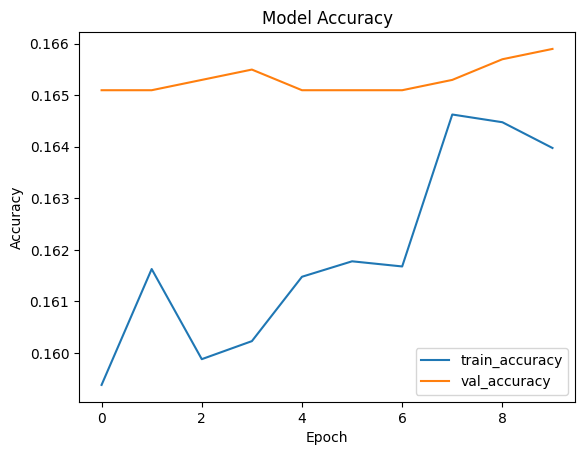

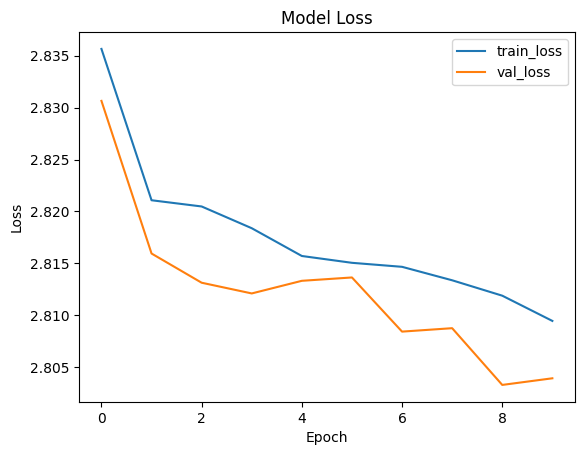

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
import kagglehub

# Skini ArtBench-10 dataset s Kaggle
artbench_path = kagglehub.dataset_download("alexanderliao/artbench10")
print("ArtBench-10 path:", artbench_path)


100%|██████████| 332M/332M [00:04<00:00, 80.2MB/s]

Extracting files...


ArtBench-10 path: /root/.cache/kagglehub/datasets/alexanderliao/artbench10/versions/2


In [ ]:
import os

print(os.listdir(artbench_path))


['ArtBench-10.csv', 'artbench-10-binary', 'artbench-10-python']


In [ ]:
print(os.listdir(artbench_path))


['ArtBench-10.csv', 'artbench-10-binary', 'artbench-10-python']


In [ ]:
# Install gdown (ako nije već instaliran)
!pip install -U gdown

# Skini ArtBench-10 ZIP s Google Drive (provjeren ZIP sa train/test folderima)
!gdown --id 1NaIbZ6U_AWQpkNSrGS8rZMlViyRTDiWW -O /content/artbench10/artbench-10-images.zip

# Unzip
!unzip -q /content/artbench10/artbench-10-images.zip -d /content/artbench10


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1NaIbZ6U_AWQpkNSrGS8rZMlViyRTDiWW

but Gdown can't. Please check connections and permissions.
[/content/artbench10/artbench-10-images.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /co

In [ ]:
!unzip -q /content/artbench-main.zip -d /content/



In [ ]:
import os

print(os.listdir('/content/'))


['.config', 'artbench-main.zip', 'artbench10', 'efficientnetb0_wikiart_model.h5', 'artbench-main', 'sample_data']


In [ ]:
print(os.listdir('/content/artbench-main'))


['LICENSE', 'assets', '.gitignore', 'artbench.py', 'README.md']


In [ ]:
efficientnet_model.save("efficientnetb0_wikiart_model.h5")

# I download:
from google.colab import files
files.download("efficientnetb0_wikiart_model.h5")


NameError: name 'efficientnet_model' is not defined

treniranje MobileNetV2

In [ ]:
import kagglehub

# Da vidiš path — PONOVNO skini ili provjeri:
wikiart_path = kagglehub.dataset_download("trungit/wikiart25k")

print("WikiArt25k path:", wikiart_path)


100%|██████████| 7.74G/7.74G [06:31<00:00, 21.2MB/s]

Extracting files...


WikiArt25k path: /root/.cache/kagglehub/datasets/trungit/wikiart25k/versions/1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator s VALIDATION SPLIT
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# TRAIN GENERATOR
train_generator = train_datagen.flow_from_directory(
    wikiart_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

# VALIDATION GENERATOR
val_generator = train_datagen.flow_from_directory(
    wikiart_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


Found 20009 images belonging to 27 classes.
Found 4991 images belonging to 27 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Baza modela
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Kompletan model
mobilenet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Kompajliranje
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 366s 142ms/step - accuracy: 0.2795 - loss: 2.4189 - val_accuracy: 0.3262 - val_loss: 2.1022
Epoch 2/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 333s 133ms/step - accuracy: 0.4480 - loss: 1.7295 - val_accuracy: 0.3386 - val_loss: 2.0882
Epoch 3/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 329s 131ms/step - accuracy: 0.4999 - loss: 1.5485 - val_accuracy: 0.3316 - val_loss: 2.0766
Epoch 4/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 337s 135ms/step - accuracy: 0.5507 - loss: 1.4068 - val_accuracy: 0.3446 - val_loss: 2.0756
Epoch 5/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 328s 131ms/step - accuracy: 0.5786 - loss: 1.3043 - val_accuracy: 0.3456 - val_loss: 2.1015
Epoch 6/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 323s 129ms/step - accuracy: 0.6193 - loss: 1.2054 - val_accuracy: 0.3458 - val_loss: 2.1304
Epoch 7/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 384s 130ms/step - accuracy: 0.6477 - loss: 1.1099 - val_accuracy: 0.3462 - val_loss: 2.1371
Epoch 8/10
2502/2502 ━━━━━━━━━━━━━━━━━━━━ 324s 129ms/step - ac

In [ ]:
mobilenet_model.save("mobilenetv2_wikiart_model.h5")


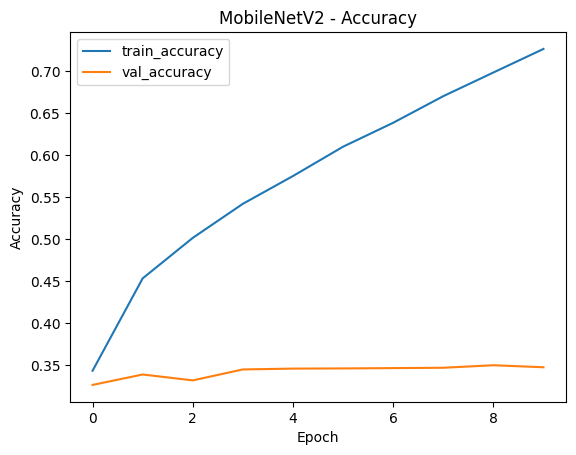

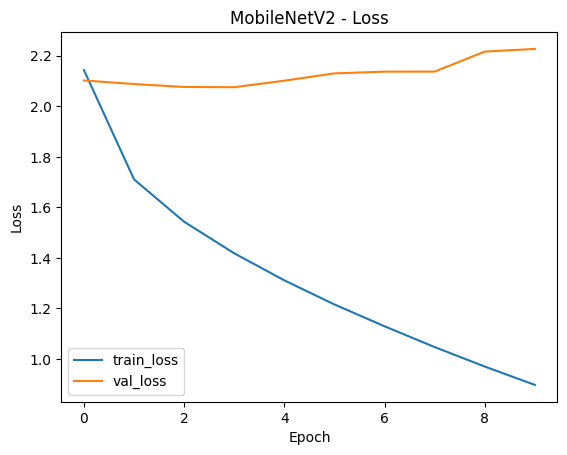

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(mobilenet_history.history['accuracy'], label='train_accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('MobileNetV2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss
plt.plot(mobilenet_history.history['loss'], label='train_loss')
plt.plot(mobilenet_history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MobileNetV2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from google.colab import files
files.download("mobilenetv2_wikiart_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>